In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.decomposition import PCA
from itertools import product
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as yPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve , plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)

from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn import preprocessing



In [110]:
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

In [111]:
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)

df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

In [112]:
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax, xticks_rotation='vertical',cmap='Greens')
    plt.show()

In [113]:
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()

In [114]:
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [115]:
#tmp=[8,249,292,308,309,311,382,554,832,1247,1283,1358,1481,1492,1702,1703,1704,1756,1757,1758,1801]

#df_train.drop(tmp,axis=0)

In [116]:
le=preprocessing.LabelEncoder()
c = df_train.select_dtypes(include=['object']).columns.tolist()
for i in c:
    df_train[i]=le.fit_transform(df_train[i])

for i in c:
    df_test[i]=le.fit_transform(df_test[i])

In [117]:
scaler = StandardScaler()
numeric_features = [n for n in df_train.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features


scaled_features_test = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features_test

In [118]:
col=[x for x in df_train.columns if x!="emotion"]
X_train=df_train[col].values
y_train = df_train["emotion"].values

In [119]:
X_test=df_test[col].values
y_test =df_test["emotion"].values

### Normalizzazione + plot grafico iniziale 

In [120]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [121]:
from sklearn.decomposition import PCA

In [122]:
pca = PCA(n_components=1)
pca.fit(X_train)
X_pca = pca.transform(X_train)

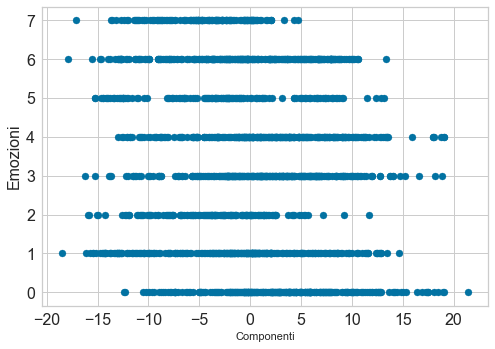

In [123]:
plt.scatter(X_pca,y_train)
plt.xlabel('Componenti')
plt.ylabel("Emozioni",fontsize=16)
plt.tick_params(axis='both',which='major',labelsize=16)
plt.show()

### Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [125]:
clf = LogisticRegression(random_state=42,max_iter =800)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=800, random_state=42)

In [126]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46314102564102566
F1-score [0.5826087  0.57798165 0.51282051 0.45       0.38297872 0.31818182
 0.28767123 0.43564356]
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        96
           1       0.52      0.66      0.58        96
           2       0.43      0.62      0.51        48
           3       0.56      0.38      0.45        96
           4       0.39      0.38      0.38        96
           5       0.35      0.29      0.32        48
           6       0.42      0.22      0.29        96
           7       0.42      0.46      0.44        48

    accuracy                           0.46       624
   macro avg       0.45      0.46      0.44       624
weighted avg       0.46      0.46      0.45       624



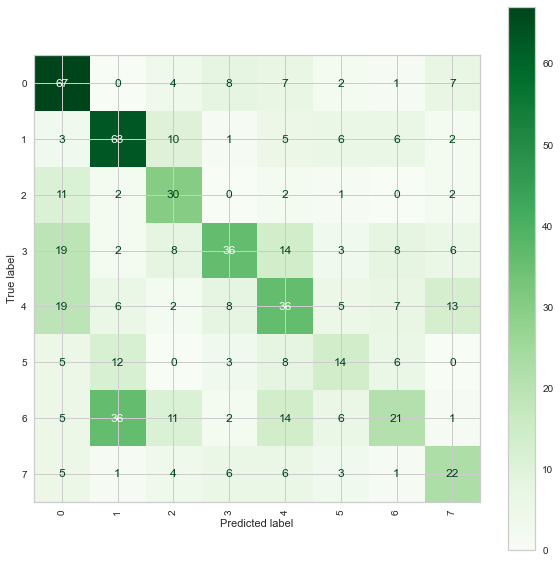

In [127]:
print_confMatrix(y_test,y_pred)

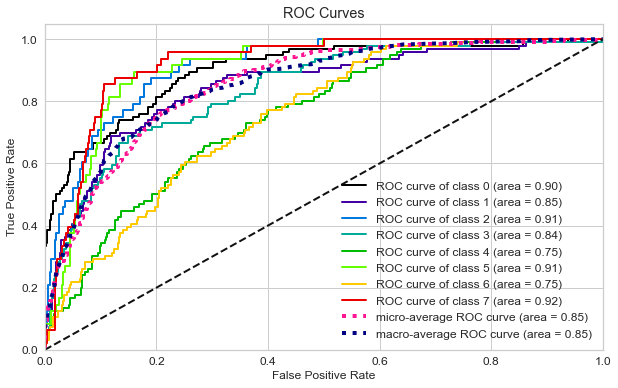

In [128]:
print_rocCurve(clf,X_test,y_test)

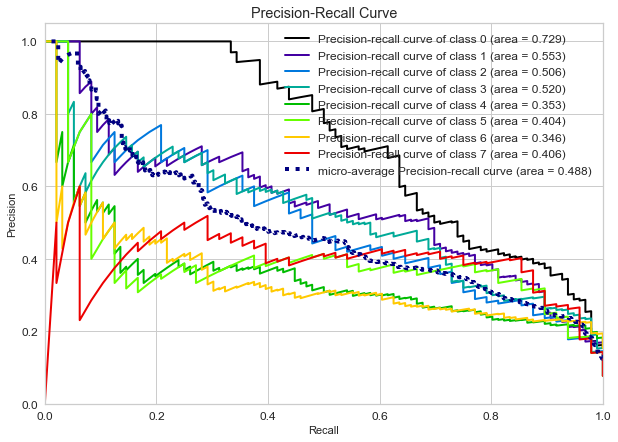

In [129]:
print_precrecCurve(clf,X_test,y_test)

### GRID SEARCH

In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#Set the parameters by cross-validation
param_grid = {
    'tol':(1.0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6),
    'C': (0.001, 0.05, 0.01, 0.1, 1.0, 10.0, 50, 100.0),
    'penalty' : ["l1","l2"],
    'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    'max_iter' :[800]
    
}
# Set the parameters by cross-validation
grid = GridSearchCV(
    LogisticRegression(random_state = 42),
    param_grid=param_grid,
    cv=StratifiedKFold(), # 
    refit=True,
    scoring="f1_macro"
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packa

In [242]:
print(grid.best_params_)

{'C': 0.1, 'max_iter': 800, 'penalty': 'l2', 'tol': 0.1}


In [130]:
clf = LogisticRegression(random_state=42,C=0.1,max_iter =600,penalty = 'l2',tol=0.1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=600, random_state=42, tol=0.1)

In [131]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4951923076923077
F1-score [0.64285714 0.57009346 0.51666667 0.50931677 0.3877551  0.30952381
 0.37086093 0.51020408]
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        96
           1       0.52      0.64      0.57        96
           2       0.43      0.65      0.52        48
           3       0.63      0.43      0.51        96
           4       0.38      0.40      0.39        96
           5       0.36      0.27      0.31        48
           6       0.51      0.29      0.37        96
           7       0.50      0.52      0.51        48

    accuracy                           0.50       624
   macro avg       0.49      0.49      0.48       624
weighted avg       0.50      0.50      0.48       624



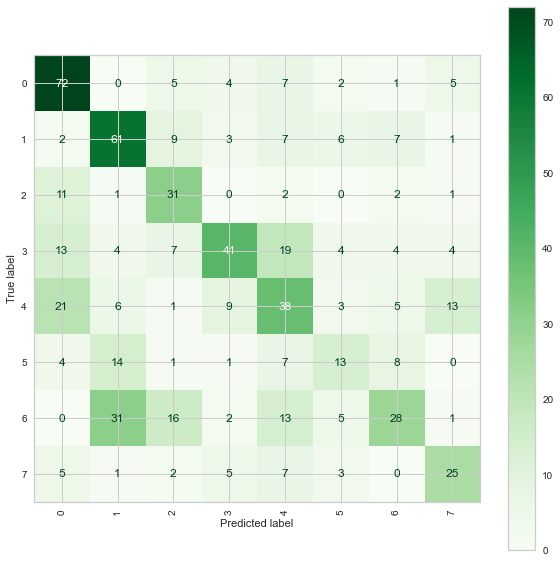

In [132]:
print_confMatrix(y_test,y_pred)

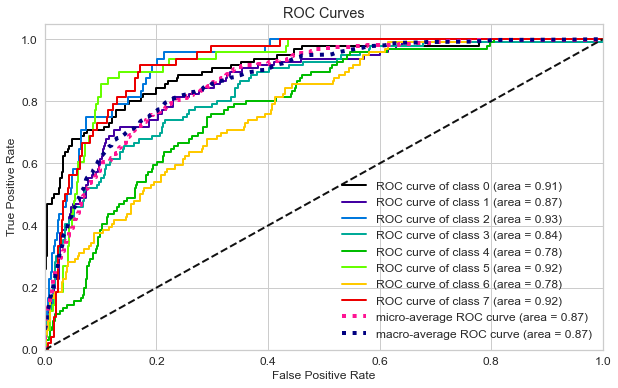

In [133]:
print_rocCurve(clf,X_test,y_test)


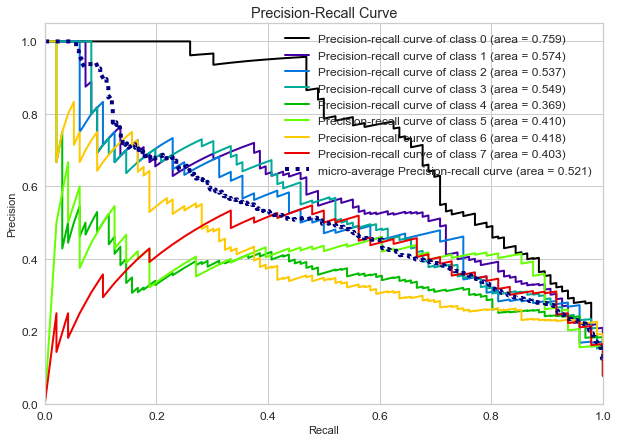

In [134]:
print_precrecCurve(clf,X_test,y_test)


### Imbalence Learning + Feature Selection

In [140]:
from imblearn.under_sampling import TomekLinks
from collections import Counter

In [141]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 261, 3: 255, 1: 251, 6: 250, 4: 249, 5: 140, 2: 128, 7: 128})


In [143]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

sel = RFE(DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20), n_features_to_select=22)
X_train_sel = sel.fit_transform(X_res, y_res)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

 DT New dimension: (1662, 22)


In [145]:
clf = LogisticRegression(random_state=42,C=0.1,max_iter =600,penalty = 'l2',tol=0.1)
clf.fit(X_train_sel, y_res)

LogisticRegression(C=0.1, max_iter=600, random_state=42, tol=0.1)

In [147]:
y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5032051282051282
F1-score [0.68444444 0.61802575 0.43956044 0.42038217 0.37349398 0.496
 0.33548387 0.5       ]
              precision    recall  f1-score   support

           0       0.60      0.80      0.68        96
           1       0.53      0.75      0.62        96
           2       0.47      0.42      0.44        48
           3       0.54      0.34      0.42        96
           4       0.44      0.32      0.37        96
           5       0.40      0.65      0.50        48
           6       0.44      0.27      0.34        96
           7       0.50      0.50      0.50        48

    accuracy                           0.50       624
   macro avg       0.49      0.51      0.48       624
weighted avg       0.50      0.50      0.48       624



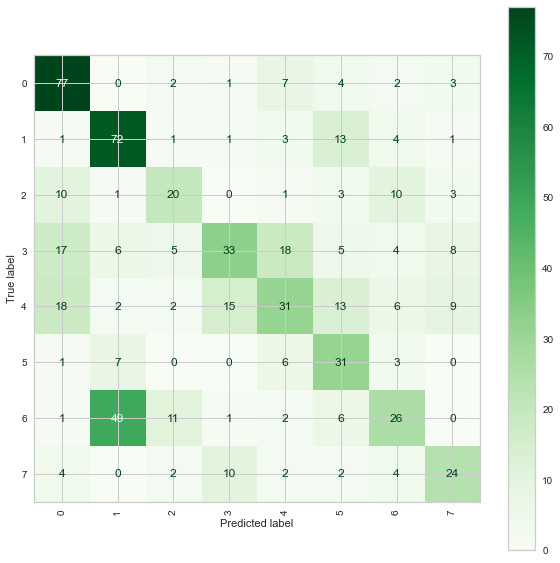

In [148]:
print_confMatrix(y_test,y_pred)

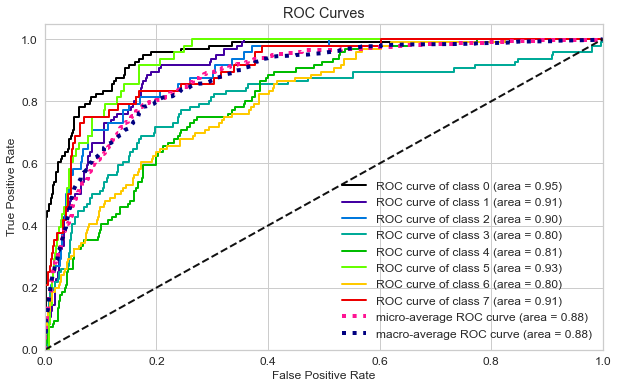

In [150]:
print_rocCurve(clf,X_test_sel,y_test)


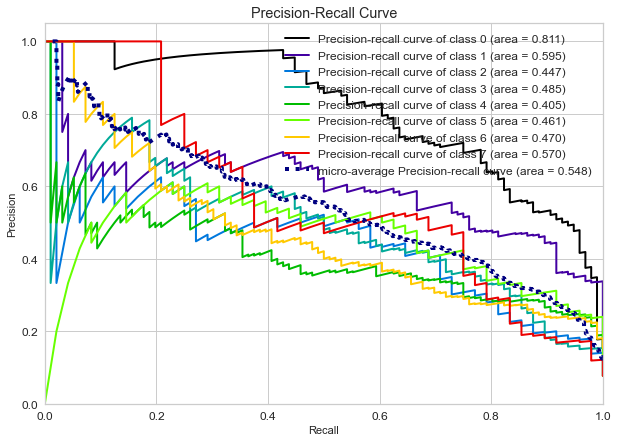

In [151]:
print_precrecCurve(clf,X_test_sel,y_test)


PROVO A ELIMINARE GLI OUTLIER

In [154]:
tmp=[8,249,292,308,309,311,382,554,832,1247,1283,1358,1481,1492,1702,1703,1704,1756,1757,1758,1801]

df_train.drop(tmp,axis=0)

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,1,5,0,1,0,1,0.018034,0.603864,-0.063106,-0.76930,...,-4.354785,0.161158,-0.925138,2.167997,1.515260,1.079945,0.690192,0.036057,9.400360,-3.035005
1,1,5,0,1,1,1,0.013950,0.603864,-0.063106,-0.76930,...,-0.659640,-0.173413,1.908839,1.610931,0.996435,0.639413,0.409754,0.036057,-0.186504,0.434538
2,1,5,0,0,0,1,0.018855,0.622665,-0.063106,-0.76930,...,-3.086640,-0.286208,-0.925138,1.285119,1.118715,0.877776,0.722854,0.036057,2.891302,-1.463754
3,1,5,0,0,1,1,0.018087,0.603864,-0.063106,-0.76930,...,-0.396009,-0.588962,1.429546,1.176485,0.899140,0.723117,0.560400,0.036057,-0.049566,-0.052845
4,1,1,0,1,0,1,0.015921,0.603864,-0.063106,-0.76930,...,-0.624456,0.170902,0.987370,1.346235,1.065980,0.761301,0.452031,0.036057,0.878701,-0.532241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1,7,0,0,1,0,-0.019175,0.622665,-0.063106,-0.74864,...,-1.106246,-0.612427,-0.925138,-1.198817,0.514836,0.503321,0.647428,0.036057,1.054354,-1.526104
1824,1,7,1,1,0,0,-0.016770,0.603864,-0.063106,-0.74864,...,-0.901054,-0.871550,-0.925138,-1.198817,-0.484862,0.298852,0.734806,0.036057,-0.389173,-0.504115
1825,1,7,1,1,1,0,-0.025751,0.622665,-0.063106,-0.74864,...,-1.106898,-0.894085,-0.925138,-0.618677,-0.058185,0.167249,0.624605,0.036057,-0.130100,-0.454243
1826,1,7,1,0,0,0,-0.009914,0.603864,-0.063106,-0.70732,...,-0.732249,-0.424644,-0.925138,-1.198817,0.165989,0.375767,0.343780,0.036057,0.072917,-1.058564


In [155]:
#col=[x for x in df_train.columns if x!="emotion"]
X_train=df_train[col].values
y_train = df_train["emotion"].values

FEATURE SELECTION + TOMEK

In [156]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 261, 3: 255, 1: 251, 6: 250, 4: 249, 5: 140, 2: 128, 7: 128})


In [157]:
sel = RFE(DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20), n_features_to_select=22)
X_train_sel = sel.fit_transform(X_res, y_res)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

 DT New dimension: (1662, 22)


In [158]:
clf = LogisticRegression(random_state=42,C=0.1,max_iter =600,penalty = 'l2',tol=0.1)
clf.fit(X_train_sel, y_res)

LogisticRegression(C=0.1, max_iter=600, random_state=42, tol=0.1)

In [159]:
y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5128205128205128
F1-score [0.67579909 0.60714286 0.5106383  0.43478261 0.38095238 0.5
 0.3625     0.55102041]
              precision    recall  f1-score   support

           0       0.60      0.77      0.68        96
           1       0.53      0.71      0.61        96
           2       0.52      0.50      0.51        48
           3       0.54      0.36      0.43        96
           4       0.44      0.33      0.38        96
           5       0.41      0.65      0.50        48
           6       0.45      0.30      0.36        96
           7       0.54      0.56      0.55        48

    accuracy                           0.51       624
   macro avg       0.50      0.52      0.50       624
weighted avg       0.51      0.51      0.50       624



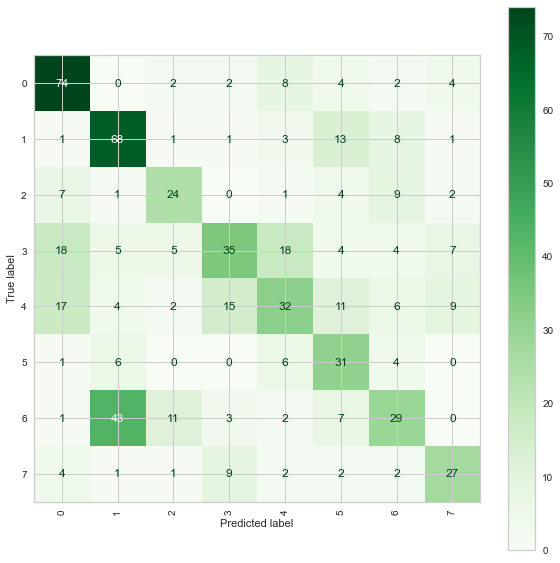

In [160]:
print_confMatrix(y_test,y_pred)

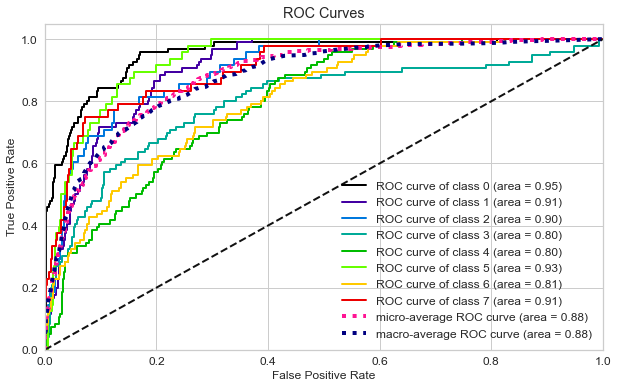

In [161]:
print_rocCurve(clf,X_test_sel,y_test)


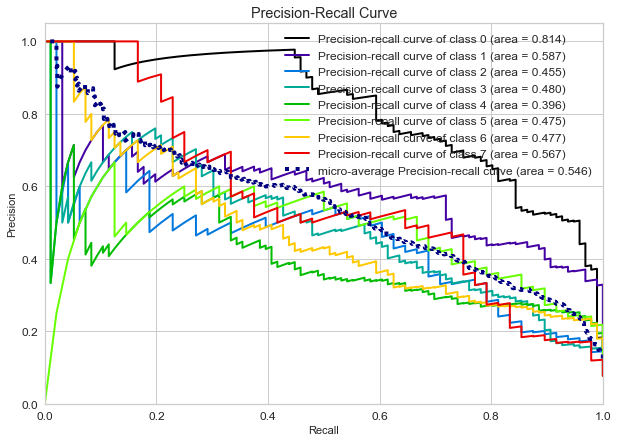

In [163]:
print_precrecCurve(clf,X_test_sel,y_test)
